# Variational Message Passing for Estimation

ForneyLab comes with support for variational message passing (VMP) (Dauwels, 2007). In this demo we illustrate VMP by estimating the mean and precision (inverse variance) of a Gaussian distribution from samples. The model is defined as:

\begin{align*}
    m   &\sim \mathcal{N}(0, 100)\\
    w   &\sim \mathcal{G}am(0.01, 0.01)\\
    y_i &\sim \mathcal{N}(m, w^{-1}) \,\,\text{for}\,\, i=1,\ldots,n
\end{align*}

Variational inference approximates the posterior over $m$ and $w$ by a recognition distribution. We minimize the KL divergence between the recognition distribution and the exact posterior through variational message passing.

In [3]:
# Generate toy data set
n = 5

m_data = 3.0
w_data = 4.0
y_data = sqrt(1/w_data)*randn(n) + m_data;

# Model specification

In [4]:
using(ForneyLab)

g = FactorGraph()

# Priors
@RV m ~ GaussianMeanVariance(0.0, 100.0)
@RV w ~ Gamma(0.01, 0.01)

# Observarion model
y = Vector{Variable}(n)
for i = 1:n
    @RV y[i] ~ GaussianMeanPrecision(m, w)
    
    placeholder(y[i], :y, index=i)
end

# Algorithm generation

With the model defined, we can now specify the recognition factorization
\begin{align*}
    q(m, w) = q(m)\times q(w)
\end{align*}
through the `RecognitionFactorization()` constructor. All variables that are deterministically linked to the argument variables (e.g. through a `+` or `=` relation) automatically become part of a single recognition factor. We can also inspect the subgraph corresponding to a recognition factor with the `draw()` function.

In [5]:
# Specify recognition factorization
q = RecognitionFactorization(m, w, ids=[:M, :W])

# Inspect the subgraph for m
ForneyLab.draw(q.recognition_factors[:M])

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 1018416536115373287 -->
 1018416536115373287 
 
 = 
 equ_m_4 
 
<!-- 12638284042824711870 -->
 12638284042824711870 
 
 = 
 equ_m_3 
 
<!-- 1018416536115373287--12638284042824711870 -->
 1018416536115373287--12638284042824711870 
 
 m 
 3 3 
 2 2 
 
<!-- 7432021149154626162 -->
 7432021149154626162 
 
 𝒩 
 gaussianmeanprecision_4 
 
<!-- 1018416536115373287--7432021149154626162 -->
 1018416536115373287--7432021149154626162 
 
 m 
 2 m 
 1 1 
 
<!-- 399724209768345850 -->
 399724209768345850 
 
 𝒩 
 gaussianmeanprecision_5 
 
<!-- 1018416536115373287--399724209768345850 -->
 1018416536115373287--399724209768345850 
 
 m 
 2 m 
 3 3 
 
<!-- 8404431292649361317 -->
 8404431292649361317 
 
 = 
 equ_m_2 
 
<!-- 12638284042824711870--8404431292649361317 -->
 12638284042824711870--8404431292649361317 
 
 m 
 3 3 
 2 2 
 
<!-- 4172459583531702764 -->
 4172459583531702764 
 
 𝒩 
 gaussianmeanprecision_3 
 
<!-- 12638284042824711870--4172459583531702764 -->
 12638284042824711870--4172459583531702764 
 
 m 
 2 m 
 1 1 
 
<!-- 2805040440794076022 -->
 2805040440794076022 
 
 = 
 equ_m_1 
 
<!-- 2560493921347322231 -->
 2560493921347322231 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 2805040440794076022--2560493921347322231 -->
 2805040440794076022--2560493921347322231 
 
 m 
 1 out 
 1 1 
 
<!-- 12325390074528207238 -->
 12325390074528207238 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 2805040440794076022--12325390074528207238 -->
 2805040440794076022--12325390074528207238 
 
 m 
 2 m 
 2 2 
 
<!-- 5505032918159464403 -->
 5505032918159464403 
 
<!-- 2560493921347322231--5505032918159464403 -->
 2560493921347322231--5505032918159464403 
 
 1 out 
 2 m 
 
<!-- 4158780173130160217 -->
 4158780173130160217 
 
<!-- 2560493921347322231--4158780173130160217 -->
 2560493921347322231--4158780173130160217 
 
 1 out 
 3 v 
 
<!-- 8404431292649361317--2805040440794076022 -->
 8404431292649361317--2805040440794076022 
 
 m 
 3 3 
 2 2 
 
<!-- 14957330025252000623 -->
 14957330025252000623 
 
 𝒩 
 gaussianmeanprecision_2 
 
<!-- 8404431292649361317--14957330025252000623 -->
 8404431292649361317--14957330025252000623 
 
 m 
 2 m 
 1 1 
 
<!-- 15024813425463905094 -->
 15024813425463905094 
 
<!-- 15024813425463905094--7432021149154626162 -->
 15024813425463905094--7432021149154626162 
 
 3 w 
 1 1 
 
<!-- 15024813425463905094--399724209768345850 -->
 15024813425463905094--399724209768345850 
 
 3 w 
 3 3 
 
<!-- 13881488116361960635 -->
 13881488116361960635 
 
<!-- 13881488116361960635--4172459583531702764 -->
 13881488116361960635--4172459583531702764 
 
 3 w 
 1 1 
 
<!-- 6497591137335630280 -->
 6497591137335630280 
 
<!-- 6497591137335630280--14957330025252000623 -->
 6497591137335630280--14957330025252000623 
 
 3 w 
 1 1 
 
<!-- 12549753986751113615 -->
 12549753986751113615 
 
<!-- 12549753986751113615--7432021149154626162 -->
 12549753986751113615--7432021149154626162 
 
 1 out 
 1 out 
 
<!-- 17656528451203866993 -->
 17656528451203866993 
 
<!-- 17656528451203866993--399724209768345850 -->
 17656528451203866993--399724209768345850 
 
 1 out 
 1 out 
 
<!-- 3838207806172592644 -->
 3838207806172592644 
 
<!-- 3838207806172592644--14957330025252000623 -->
 3838207806172592644--14957330025252000623 
 
 1 out 
 1 out 
 
<!-- 6050595386072212816 -->
 6050595386072212816 
 
<!-- 6050595386072212816--12325390074528207238 -->
 6050595386072212816--12325390074528207238 
 
 1 out 
 1 out 
 
<!-- 8777123854718964440 -->
 8777123854718964440 
 
<!-- 8777123854718964440--4172459583531702764 -->
 8777123854718964440--4172459583531702764 
 
 1 out 
 1 out 
 
<!-- 3636041068777270424 -->
 3636041068777270424 
 
<!-- 3636041068777270424--12325390074528207238 -->
 3636041068777270424--12325390074528207238 
 
 3 w 


In [6]:
# Inspect the subgraph for m
ForneyLab.draw(q.recognition_factors[:W])

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 13881488116361960635 -->
 13881488116361960635 
 
 = 
 equ_w_3 
 
<!-- 4172459583531702764 -->
 4172459583531702764 
 
 𝒩 
 gaussianmeanprecision_3 
 
<!-- 13881488116361960635--4172459583531702764 -->
 13881488116361960635--4172459583531702764 
 
 w 
 3 w 
 1 1 
 
<!-- 6497591137335630280 -->
 6497591137335630280 
 
 = 
 equ_w_2 
 
<!-- 13881488116361960635--6497591137335630280 -->
 13881488116361960635--6497591137335630280 
 
 w 
 3 3 
 2 2 
 
<!-- 10320009479475761617 -->
 10320009479475761617 
 
 Gam 
 gamma_1 
 
<!-- 11200660666321996615 -->
 11200660666321996615 
 
<!-- 10320009479475761617--11200660666321996615 -->
 10320009479475761617--11200660666321996615 
 
 1 out 
 2 a 
 
<!-- 14718679817611710057 -->
 14718679817611710057 
 
<!-- 10320009479475761617--14718679817611710057 -->
 10320009479475761617--14718679817611710057 
 
 1 out 
 3 b 
 
<!-- 14957330025252000623 -->
 14957330025252000623 
 
 𝒩 
 gaussianmeanprecision_2 
 
<!-- 6497591137335630280--14957330025252000623 -->
 6497591137335630280--14957330025252000623 
 
 w 
 3 w 
 1 1 
 
<!-- 3636041068777270424 -->
 3636041068777270424 
 
 = 
 equ_w_1 
 
<!-- 6497591137335630280--3636041068777270424 -->
 6497591137335630280--3636041068777270424 
 
 w 
 3 3 
 2 2 
 
<!-- 15024813425463905094 -->
 15024813425463905094 
 
 = 
 equ_w_4 
 
<!-- 15024813425463905094--13881488116361960635 -->
 15024813425463905094--13881488116361960635 
 
 w 
 3 3 
 2 2 
 
<!-- 7432021149154626162 -->
 7432021149154626162 
 
 𝒩 
 gaussianmeanprecision_4 
 
<!-- 15024813425463905094--7432021149154626162 -->
 15024813425463905094--7432021149154626162 
 
 w 
 3 w 
 1 1 
 
<!-- 399724209768345850 -->
 399724209768345850 
 
 𝒩 
 gaussianmeanprecision_5 
 
<!-- 15024813425463905094--399724209768345850 -->
 15024813425463905094--399724209768345850 
 
 w 
 3 w 
 3 3 
 
<!-- 3636041068777270424--10320009479475761617 -->
 3636041068777270424--10320009479475761617 
 
 w 
 1 out 
 1 1 
 
<!-- 12325390074528207238 -->
 12325390074528207238 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 3636041068777270424--12325390074528207238 -->
 3636041068777270424--12325390074528207238 
 
 w 
 3 w 
 2 2 
 
<!-- 1018416536115373287 -->
 1018416536115373287 
 
<!-- 1018416536115373287--7432021149154626162 -->
 1018416536115373287--7432021149154626162 
 
 2 m 
 1 1 
 
<!-- 1018416536115373287--399724209768345850 -->
 1018416536115373287--399724209768345850 
 
 2 m 
 3 3 
 
<!-- 8404431292649361317 -->
 8404431292649361317 
 
<!-- 8404431292649361317--14957330025252000623 -->
 8404431292649361317--14957330025252000623 
 
 2 m 
 1 1 
 
<!-- 12549753986751113615 -->
 12549753986751113615 
 
<!-- 12549753986751113615--7432021149154626162 -->
 12549753986751113615--7432021149154626162 
 
 1 out 
 1 out 
 
<!-- 17656528451203866993 -->
 17656528451203866993 
 
<!-- 17656528451203866993--399724209768345850 -->
 17656528451203866993--399724209768345850 
 
 1 out 
 1 out 
 
<!-- 3838207806172592644 -->
 3838207806172592644 
 
<!-- 3838207806172592644--14957330025252000623 -->
 3838207806172592644--14957330025252000623 
 
 1 out 
 1 out 
 
<!-- 2805040440794076022 -->
 2805040440794076022 
 
<!-- 2805040440794076022--12325390074528207238 -->
 2805040440794076022--12325390074528207238 
 
 2 m 
 2 2 
 
<!-- 6050595386072212816 -->
 6050595386072212816 
 
<!-- 6050595386072212816--12325390074528207238 -->
 6050595386072212816--12325390074528207238 
 
 1 out 
 1 out 
 
<!-- 8777123854718964440 -->
 8777123854718964440 
 
<!-- 8777123854718964440--4172459583531702764 -->
 8777123854718964440--4172459583531702764 
 
 1 out 
 1 out 
 
<!-- 12638284042824711870 -->
 12638284042824711870 
 
<!-- 12638284042824711870--4172459583531702764 -->
 12638284042824711870--4172459583531702764 
 
 

In [8]:
# Generate variational update algorithms for each recognition factor
algo = variationalAlgorithm(q)

# Inspect the algorithm code
println(algo)

begin

function stepM!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(10))

messages[1] = ruleVBGaussianMeanVarianceOut(nothing, ProbabilityDistribution(Univariate, PointMass, m=0.0), ProbabilityDistribution(Univariate, PointMass, m=100.0))
messages[2] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][4]), nothing, marginals[:w])
messages[3] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][5]), nothing, marginals[:w])
messages[4] = ruleSPEqualityGaussian(messages[2], nothing, messages[3])
messages[5] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][3]), nothing, marginals[:w])
messages[6] = ruleSPEqualityGaussian(messages[5], nothing, messages[4])
messages[7] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][2]), nothing, marginals[:w])
messages[8] = ruleSPEqualityGaussian(messages[7], nothing, messag

Note that the algorithm now contains two `step!()` functions; one for each recognition factor. This is because variational message passing is an iterative algorithm, where `stepM!()` requires the marginal from `marginals[:w]` and `stepW!()` requires `marginals[:m]`. This requires us to initialize the marginals before we start the inference. The `marginals` argument allows us to pass an initial dictionary of marginals. Upon execution, this dictionary is updated in-place with the newly computed outcomes.

Additionally, we can also automatically generate code that evaluates the free energy, with `freeEnergyAlgorithm()`. This yields a model-specific `freeEnergy()` function that accepts the `data` and `marginals` dictionaries. 

The free energy can be used to check for convergence or to perform model comparisons.

In [9]:
algo_F = freeEnergyAlgorithm(q)

println(algo_F)

function freeEnergy(data::Dict, marginals::Dict)

F = 0.0

F += averageEnergy(Gamma, marginals[:w], ProbabilityDistribution(Univariate, PointMass, m=0.01), ProbabilityDistribution(Univariate, PointMass, m=0.01))
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][1]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][2]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][3]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][4]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][5]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanVariance, marginals[:m], ProbabilityDistribution(Univariate, PointMass, m=0.0), Pr

# Execution

In [10]:
# Load algorithms
eval(parse(algo))
eval(parse(algo_F));

As mentioned before, we need to initialize the `marginals` dictionary. After initialization, we iteratively step through the algorithm functions and evaluate the free energy and estimates after each iteration (for visualization purposes).

In [12]:
data = Dict(:y => y_data)

# Initial recognition distributions
marginals = Dict(:m => vague(GaussianMeanVariance),
                 :w => vague(Gamma))

n_its = 2*n
F = Vector{Float64}(n_its) # Initialize vector for storing Free energy
m_est = Vector{Float64}(n_its)
w_est = Vector{Float64}(n_its)
for i = 1:n_its
    stepM!(data, marginals)
    stepW!(data, marginals)
    
    # Store free energy
    F[i] = freeEnergy(data, marginals)
    
    # Store intermediate estimates
    m_est[i] = mean(marginals[:m])
    w_est[i] = mean(marginals[:w])
end
;

# Results

We plot the evolution of the means of the recognition distributions and the free energy as variational algorithm progresses.

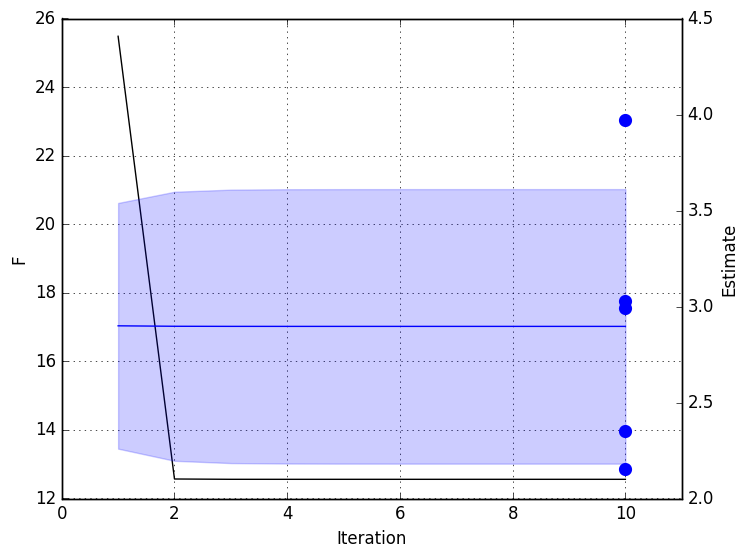

In [13]:
using PyPlot

# Plot free energy to check for convergence
plot(1:n_its, F, color="black")
grid("on")
xlabel("Iteration")
ylabel("F")

# Plot estimated distribution
PyPlot.plt[:twinx]()
plot(1:n_its, m_est, color="blue")
fill_between(1:n_its, m_est-sqrt.(1.0./w_est), m_est+sqrt.(1.0./w_est), color="blue", alpha=0.2)
ylabel("Estimate")

# Plot samples
scatter(n_its*ones(n), y_data, color="blue", linewidth=5)

xlim(0.0, n_its+1)
;

In [14]:
# Inspect the results
println("\n----- Estimates after $(n_its) VMP updates -----")
println("Mean estimate: $(round(mean(marginals[:m]),2)), with variance $(round(var(marginals[:m]),2))")
println("Precision estimate: $(round(mean(marginals[:w]),2)), with variance $(round(var(marginals[:w]),2))")


----- Estimates after 10 VMP updates -----
Mean estimate: 2.9, with variance 0.1
Precision estimate: 1.96, with variance 1.53
